# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [312]:
# Note: Some of my code was inspired by Hvass Lab's tensorflow tutorials.

In [313]:
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math


In [314]:
#print (train.keys())

In [458]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

#print (X_train.shape)
print (X_test.shape)
print (y_test.shape)
print (y_test[1])

print(y_train.shape)
print (y_test.shape)

print (len(X_test))




#X_test = X_test.reshape(12630, 32*32 *3)

(12630, 32, 32, 3)
(12630,)
1
(39209,)
(12630,)
12630
16


In [316]:
X_train = X_train.reshape(39209, 32*32*3)
X_test = X_test.reshape(12630, 32*32 *3)

In [317]:
# Convert image to grayscale 
#Code from Vivek

def pre_process_image(image):
    
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image.flatten()/255.

train_features = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
test_features = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)

In [318]:
# Flatten the images for greyscale

X_train = X_train.reshape(39209, 32*32*3)
X_test = X_test.reshape(12630, 32*32 *3)



In [319]:
# Implement Min-Max scaling for greyscale image data
'''
def normalize_greyscale(image_data):
    
    a = 0.1
    b = 0.9
    Xmin = 0
    X = image_data
    Xmax = 255
    return 0.1 + ((X-Xmin)*(b-a)/(Xmax - Xmin))

train_features = normalize_greyscale(X_train)
test_features = normalize_greyscale(X_test)
is_features_normal = True

print ('Tests passed!')
'''

"\ndef normalize_greyscale(image_data):\n    \n    a = 0.1\n    b = 0.9\n    Xmin = 0\n    X = image_data\n    Xmax = 255\n    return 0.1 + ((X-Xmin)*(b-a)/(Xmax - Xmin))\n\ntrain_features = normalize_greyscale(X_train)\ntest_features = normalize_greyscale(X_test)\nis_features_normal = True\n\nprint ('Tests passed!')\n"

In [320]:
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

print (train_labels.shape)

# Change to float32, so that it can be multiplied against the features in TensorFlow which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)
is_labels_encod = True

print ('Labels One-Hot Encoded')

print (train_labels.shape)



(39209, 43)
Labels One-Hot Encoded
(39209, 43)


In [321]:
# Convolutional Layer 1
filter_size1 = 5 # Convolutional filters are 5 x 5 pixels
num_filters1 = 16 # There are 16 of these filters.

# Convolution Layer 2.
filter_size2 = 5
num_filters2 = 36

# Fully-connected layer
fc_size = 128


In [322]:
#test_cls = np.argmax(X_test, axis=1)
test_cls = np.argmax(test_labels, axis=1)


In [323]:
img_size = 32

num_channels = 3

img_shape = (img_size, img_size, num_channels)



img_size_flat = img_size * img_size * num_channels

#print (img_size_flat)

num_classes = 43

In [506]:
def plot_images(images, cls_true, cls_pred=None):
   
    #assert len(images) == len(cls_true) == 9
    
    
    
    
    # Create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    print ("axes.flat", axes.flat)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        
        ax.imshow(images[i].reshape(img_shape),cmap='binary')
        
        # Show true and predicted classes
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        
        # Show the classes as the label on the x-axis
        ax.set_xlabel(xlabel)
        
        #Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

axes.flat <numpy.flatiter object at 0x16c019c00>


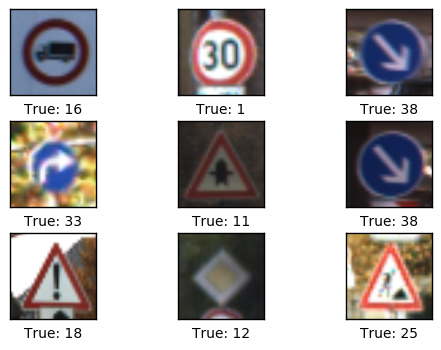

In [325]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
images = test_features[:9]

cls_true = test_cls[:9]

plot_images(images = images, cls_true = cls_true)

In [326]:
def new_weights(shape):
    #return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
    return tf.Variable(tf.truncated_normal(shape, stddev=0.01, mean=0))


In [327]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [328]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, use_pooling=True):
    shape = [filter_size, filter_size, num_input_channels, num_filters]
    
    weights = new_weights(shape=shape)
    
    biases = new_biases(length=num_filters)
    
    layer = tf.nn.conv2d(input=input, 
                        filter=weights,
                        strides=[1,1,1,1],
                        padding='SAME')
    
    layer += biases
    
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                              ksize=[1,2,2,1],
                              strides=[1,2,2,1],
                              padding='SAME')
        
    layer = tf.nn.relu(layer)
    
    return layer, weights

In [329]:
def flatten_layer(layer):
    layer_shape = layer.get_shape()
    
    num_features = layer_shape[1:4].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features

In [330]:
def new_fc_layer(input,
                num_inputs,
                num_outputs,
                use_relu=True):
    
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    
    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
        
    return layer

In [331]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat])#changed wed 6:33pm

#x = tf.placeholder(tf.float32, shape=[None, (32,32,3)])

x


<tf.Tensor 'Placeholder_14:0' shape=(?, 3072) dtype=float32>

In [332]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
x_image

<tf.Tensor 'Reshape_20:0' shape=(?, 32, 32, 3) dtype=float32>

In [333]:
y_true = tf.placeholder(tf.float32, shape=[None, 43], name='y_true')


In [334]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [335]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input = x_image,
                  num_input_channels=num_channels,
                  filter_size=filter_size1,
                  num_filters=num_filters1,
                  use_pooling=True)

In [336]:
layer_conv1

<tf.Tensor 'Relu_12:0' shape=(?, 16, 16, 16) dtype=float32>

In [337]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                  num_input_channels=num_filters1,
                  filter_size=filter_size2,
                  num_filters=num_filters2,
                  use_pooling=True)

In [338]:
layer_conv2

<tf.Tensor 'Relu_13:0' shape=(?, 8, 8, 36) dtype=float32>

In [339]:
layer_flat, num_features = flatten_layer(layer_conv2)

In [340]:
layer_flat

<tf.Tensor 'Reshape_21:0' shape=(?, 2304) dtype=float32>

In [341]:
num_features

2304

In [342]:
layer_fcl = new_fc_layer(input=layer_flat,
                        num_inputs=num_features,
                        num_outputs=fc_size,
                        use_relu=True)

In [343]:
layer_fc2 = new_fc_layer(input=layer_fcl,
                        num_inputs=fc_size,
                        num_outputs=num_classes,
                        use_relu=False)

In [344]:
layer_fc2

<tf.Tensor 'add_19:0' shape=(?, 43) dtype=float32>

In [345]:
y_pred = tf.nn.softmax(layer_fc2)

In [346]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [347]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                       labels=y_true)

In [348]:
cost = tf.reduce_mean(cross_entropy)

In [349]:
#optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

In [350]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [351]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [352]:
session = tf.Session()

In [353]:
session.run(tf.initialize_all_variables())

In [354]:
train_batch_size = 64

In [355]:
total_iterations = 0

def optimize(num_iterations):
    global total_iterations
    
    start_time = time.time()
    
    for i in range(total_iterations, 
                  total_iterations + num_iterations):
        
        x_batch, X_valid, y_true_batch, y_valid = train_test_split(
        train_features,
        train_labels,
        test_size=0.05,
        random_state=832289)
        
        #y_true_batch = np.reshape(y_true_batch, (-1, 43))
    
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        
       
       
    
        session.run(optimizer, feed_dict=feed_dict_train)
    
        if i % 100 == 0:
            acc = session.run(accuracy, feed_dict = feed_dict_train)
        
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"
        
            print (msg.format(i + 1, acc))
    
    total_iterations += num_iterations
    
    end_time = time.time()
    
    time_diff = end_time - start_time
    
    print ("Time usages: " + str(timedelta(seconds=int(round(time_diff)))))
    
    
    
    

In [534]:
def plot_example_errors(cls_pred, correct):
    
    incorrect = (correct == False)
    
    
    
    images = X_test[incorrect]
    
    
    
    cls_pred = cls_pred[incorrect]
    
    print ("is scalar cls_pred", np.isscalar(cls_pred))
    
    cls_true = test_cls[incorrect]
    
    print ("is scalar cls_true", np.isscalar(cls_true))
        
    print ("is scalar images", np.isscalar(images))
    
    plot_images(images=images[0:9],
               cls_true=cls_true[0:9],
               cls_pred=cls_pred[0:9])

In [357]:
def plot_confusion_matrix(cls_pred):
    
    cls_true = test_cls
    
    cm = confusion_matrix(y_true= cls_true,
                         y_pred=cls_pred)
    
    print(cm)
    
    plt.matshow(cm)
    
    plt.colorbar()
    tick_marks = np.arrange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [358]:
test_batch_size= 64

features = tf.placeholder(tf.float32, [None, train_features.shape[1]])
labels = tf.placeholder(tf.float32, [None, train_labels.shape[1]])

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):
    
    num_test = len(X_test)
    
    cls_pred = np.zeros(shape=num_test, dtype=np.int)
    
    i = 0
    
    while i < num_test:
        
        j = min(i + test_batch_size, num_test)
        
        images = test_features[i:j, :]
        
        
        #labels = train_labels[i:j, :]
        labels = train_labels[i:j]
        
        
        
        

        
        feed_dict = {x: images, y_true: labels}
        
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)
        
        i = j
        
    cls_true = test_cls
    
    correct = (cls_true == cls_pred)
    
    correct_sum = correct.sum()
    
    acc = float(correct_sum) / num_test
    
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    
    print (msg.format(acc, correct_sum, num_test))

    if show_example_errors:
        print ("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)
        
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)
        
    

Accuracy on Test-Set: 77.7% (9814 / 12630)
Example errors:
incorrect [False False False ...,  True False False]
X_test [[[[116 139 174]
   [116 137 171]
   [118 138 172]
   ..., 
   [ 98 114 143]
   [ 97 121 147]
   [ 85 105 130]]

  [[115 142 176]
   [115 140 174]
   [117 141 175]
   ..., 
   [119 143 176]
   [120 141 173]
   [120 139 171]]

  [[117 141 174]
   [117 142 175]
   [114 140 172]
   ..., 
   [120 144 179]
   [122 144 179]
   [120 143 177]]

  ..., 
  [[117 137 167]
   [115 134 164]
   [117 135 164]
   ..., 
   [115 137 169]
   [116 136 168]
   [118 139 172]]

  [[116 136 166]
   [114 134 168]
   [113 131 166]
   ..., 
   [113 135 167]
   [117 136 165]
   [115 139 167]]

  [[112 135 167]
   [110 134 165]
   [119 135 165]
   ..., 
   [115 138 167]
   [117 138 167]
   [114 140 170]]]


 [[[ 59  70  61]
   [ 87  80  63]
   [ 92  81  63]
   ..., 
   [ 77  64  67]
   [ 71  65  67]
   [ 74  69  68]]

  [[ 59  68  58]
   [ 94  83  65]
   [ 95  80  62]
   ..., 
   [ 77  64  66]
   

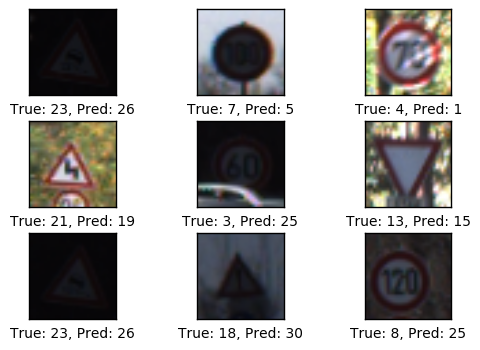

In [535]:
print_test_accuracy(show_example_errors=True)

In [360]:
optimize(num_iterations=1)

Optimization Iteration:      1, Training Accuracy:   5.6%
Time usages: 0:03:10


In [361]:
print_test_accuracy()

Accuracy on Test-Set: 5.7% (720 / 12630)


Accuracy on Test-Set: 77.7% (9814 / 12630)
Example errors:
is scalar cls_pred False
is scalar cls_true False
is scalar images False
axes.flat <numpy.flatiter object at 0x15ead9400>


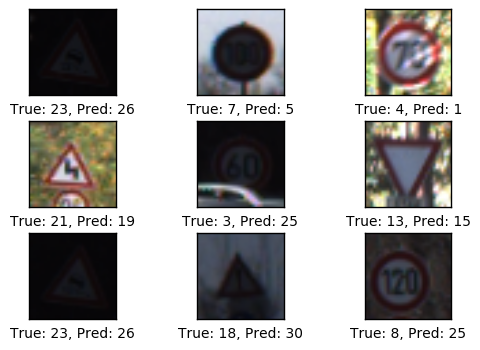

In [455]:
print_test_accuracy(show_example_errors=True)

In [363]:
### optimize(num_iterations=100)

In [364]:
optimize(num_iterations=1000)

Optimization Iteration:    101, Training Accuracy:  10.7%
Optimization Iteration:    201, Training Accuracy:  48.3%
Optimization Iteration:    301, Training Accuracy:  64.7%
Optimization Iteration:    401, Training Accuracy:  76.4%
Optimization Iteration:    501, Training Accuracy:  85.6%
Optimization Iteration:    601, Training Accuracy:  91.5%
Optimization Iteration:    701, Training Accuracy:  95.0%


KeyboardInterrupt: 

Accuracy on Test-Set: 77.7% (9814 / 12630)
Example errors:
axes.flat <numpy.flatiter object at 0x15d09aa00>


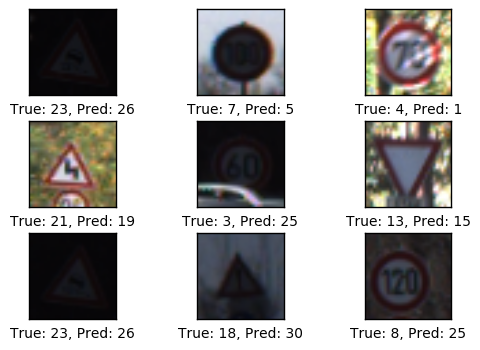

In [365]:
print_test_accuracy(show_example_errors=True)

In [366]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [367]:
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = session.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
    saver = tf.train.Saver()
    saver.save(sess,save_path) 

In [368]:
'''

### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = 550

# TODO: number of testing examples
n_test = 100

# TODO: what's the shape of an image?
image_shape = tf.placeholder(tf.float32, [None, 1024])

# TODO: how many classes are in the dataset
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
'''

'\n\n### To start off let\'s do a basic data summary.\n\n# TODO: number of training examples\nn_train = 550\n\n# TODO: number of testing examples\nn_test = 100\n\n# TODO: what\'s the shape of an image?\nimage_shape = tf.placeholder(tf.float32, [None, 1024])\n\n# TODO: how many classes are in the dataset\nn_classes = 43\n\nprint("Number of training examples =", n_train)\nprint("Number of testing examples =", n_test)\nprint("Image data shape =", image_shape)\nprint("Number of classes =", n_classes)\n'

In [369]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [370]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [371]:
'''I used the below to preprocess the data. Actually I was having issues with my model and then Vivek looked at it and suggested adding the
following so I did. I had been doing something else before but I forget what. 

def pre_process_image(image):
    
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image.flatten()/255.

train_features = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
test_features = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)
'''

'I used the below to preprocess the data. Actually I was having issues with my model and then Vivek looked at it and suggested adding the\nfollowing so I did. I had been doing something else before but I forget what. \n\ndef pre_process_image(image):\n    \n    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    return image.flatten()/255.\n\ntrain_features = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],\n                          dtype = np.float32)\ntest_features = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],\n                          dtype = np.float32)\n'

In [372]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [373]:
'''I used this 

x_batch, X_valid, y_true_batch, y_valid = train_test_split(
        train_features,
        train_labels,
        test_size=0.05,
        random_state=832289)


I didnt use additional data. If I had had more time I would have looked into jittering the images. But things were slow going. 
'''

'I used this \n\nx_batch, X_valid, y_true_batch, y_valid = train_test_split(\n        train_features,\n        train_labels,\n        test_size=0.05,\n        random_state=832289)\n\n\nI didnt use additional data. If I had had more time I would have looked into jittering the images. But things were slow going. \n'

In [374]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


In [375]:
'''I based my model on the Hvass TensorFlow lab 2. This was because the additional resources hadnt yet been added to Udacity. a
I had two convolutional layers and a fully connected layer and output layer. '''

'I based my model on the Hvass TensorFlow lab 2. This was because the additional resources hadnt yet been added to Udacity. a\nI had two convolutional layers and a fully connected layer and output layer. '

**Answer:**

In [376]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In [377]:
'''I used the AdamOptimizer, 64 for the batch size, learning rate of 1e-3. '''

'I used the AdamOptimizer, 64 for the batch size, learning rate of 1e-3. '

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

In [378]:
'''I heavily based my approach on the Hvass Labs 2 tutorial. I also discussed on slack about changing my parameters and changed them to .01, .25 and 
things got worse and worse. Then I realized I was overfitting the data. Then I changed it to 1e-3 and also tried 128 and 64 for the batch size. 

I got the best results using a learning rate of 1e-3, 64 for the batch size. I had trouble setting up my amazon account, because it said Im
only allowed 0 paid accounts. So I am talking to support to get my account upgraded. '''

'I heavily based my approach on the Hvass Labs 2 tutorial. I also discussed on slack about changing my parameters and changed them to .01, .25 and \nthings got worse and worse. Then I realized I was overfitting the data. Then I changed it to 1e-3 and also tried 128 and 64 for the batch size. \n\nI got the best results using a learning rate of 1e-3, 64 for the batch size. I had trouble setting up my amazon account, because it said Im\nonly allowed 0 paid accounts. So I am talking to support to get my account upgraded. '

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

imge 1 origina shape (225, 225, 3)
imge 1 origina shape (225, 225, 3)
imge 1 origina shape (259, 194, 3)
imge 1 origina shape (211, 239, 3)
imge 1 origina shape (251, 201, 3)
(32, 32, 3)
0


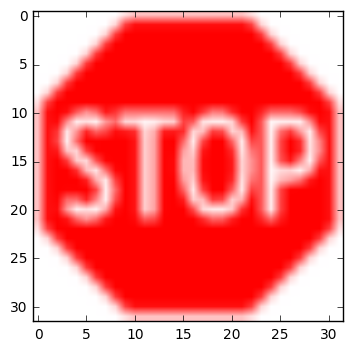

In [550]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Code from Atlassian
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from scipy.misc import imresize

image1 = mpimg.imread('images/stopsign.png')
image2=mpimg.imread('images/bicyclecrossing.png')
image3=mpimg.imread('images/rightturnonly.png')
image4=mpimg.imread('images/yieldsign.png')
image5=mpimg.imread('images/speedlimit30.png')
#plt.imshow(image1)
print ("imge 1 origina shape", image1.shape)
print ("imge 1 origina shape", image2.shape)
print ("imge 1 origina shape", image3.shape)
print ("imge 1 origina shape", image4.shape)
print ("imge 1 origina shape", image5.shape)


image1= imresize(image1,(32, 32,3))
image2= imresize(image2,(32, 32,3))
image3= imresize(image3,(32, 32,3))
image4= imresize(image4, (32, 32,3))
image5= imresize(image5, (32, 32,3))
plt.imshow(image1)


X_test_myimages = np.ndarray(shape=(5,32,32,3))
y_test_myimages = np.ndarray(shape=(5,),dtype=np.int32)

X_test_myimages[0]=image1
y_test_myimages[0]=3
X_test_myimages[1]=image2
y_test_myimages[1]=0
X_test_myimages[2]=image3
y_test_myimages[2]=1
X_test_myimages[3]=image4
y_test_myimages[3]=4
X_test_myimages[4]=image5
y_test_myimages[4]=2

print (X_test_myimages[0].shape)

print (y_test_myimages[1])




In [577]:



def pre_process_image_myimages(image):
    
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return (image-128)/128.

#test_features_myimages = (pre_process_image_myimages(X_test_myimages[i]) for i in range(len(X_test_myimages)))
test_features_myimages = np.array([pre_process_image_myimages(X_test_myimages[i]) for i in range(len(X_test_myimages))],dtype = np.float32)
print (test_features_myimages.shape)
print (len(test_features_myimages))

(5, 32, 32, 3)
5


In [548]:
# Flatten the images for greyscale
print (X_test_myimages.shape)
#X_test_myimages = X_test_myimages.reshape(5, 32*32*3)
#print (X_test_myimages.shape)




(5, 32, 32, 3)


In [488]:
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
#encoder.fit(y_train)
y_test_myimages = y_test_myimages.astype(np.int32)

encoder.fit(y_test_myimages)
#train_labels = encoder.transform(y_train)

test_labels_myimages = encoder.transform(y_test_myimages)



# Change to float32, so that it can be multiplied against the features in TensorFlow which are float32
#train_labels = train_labels.astype(np.float32)
#test_labels_myimages = test_labels_myimages.astype(np.float32)
#test_labels_myimages = test_labels_myimages.astype(np.int32)
is_labels_encod = True

print ('Labels One-Hot Encoded')

#print (train_labels.shape)


Labels One-Hot Encoded


In [558]:
def plot_image_myimage(image):
    #plt.imshow(image.reshape(img_shape),interpolation='nearest',cmap='binary')

    plt.show(image)

In [490]:
y_true_myimages = tf.placeholder(tf.float32, shape=[None, 5], name='y_true')

images shape (5, 32, 32, 3)
images [[[[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   ..., 
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]]

  [[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   ..., 
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]]

  [[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   ..., 
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]]

  ..., 
  [[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   ..., 
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]]

  [[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   ..., 
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]]

  [[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   ..., 
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]]]


 [[[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.

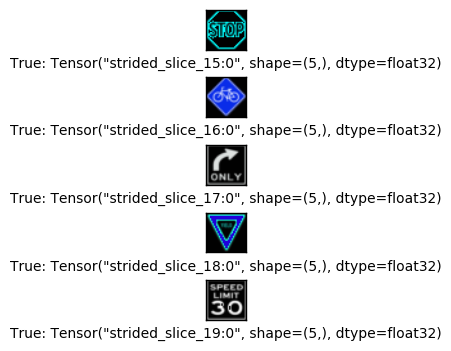

In [559]:

plot_images_myimages(X_test_myimages,y_true_myimages)
#plt.imshow(image1)


axes.flat <numpy.flatiter object at 0x16c149000>


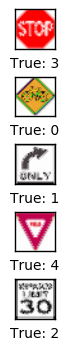

In [492]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
myimages = test_features_myimages[:5]
test_cls_myimages = np.argmax(test_labels_myimages, axis=1)
cls_true_myimages = test_cls_myimages[:5]


plot_images_myimages(images = myimages, cls_true_myimages = cls_true_myimages)

In [575]:
def plot_images_myimages(images, cls_true_myimages, cls_pred=None):
   
    print ("images shape", images.shape)
    # Create figure with 5x1 instead of 3x3 sub-plots as was the original
    fig, axes = plt.subplots(5,1)
    fig.subplots_adjust(hspace=0.7, wspace=0.3)
    
    #print ("images", images)
    print ("enumerate axes.flat" ,enumerate(axes.flat))
    print ("axes.flat", axes.flat)
    
    for item in axes.flat:
        print ("Item", item)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        #print ("images i", images[1])
        print ("******i", i)
        print ("*****ax",ax)
        print ("images[0].shape", images[0].shape)
        ax.imshow(images[i])
        #ax.imshow(images[i].reshape(img_shape),cmap='binary')
        
        # Show true and predicted classes
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_myimages[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true_myimages[i], cls_pred[i])
        
        # Show the classes as the label on the x-axis
        ax.set_xlabel(xlabel)
        
        #Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

In [567]:
def plot_example_errors_myimages(cls_pred, correct):
    
    print ("cls_pred shape", cls_pred.shape)
    
    #print ("correct.shape ", correct.shape)
    
    print ("is scalar cls_pred", np.isscalar(cls_pred))
    
    incorrect = (correct == False)
    
    print ("incorrect", incorrect)
    
    #print ("X_test_myimages", X_test_myimages)
    
    print ("X test shape", X_test_myimages.shape)
    
    myimages = X_test_myimages[incorrect]
    
    print ("images", myimages)
    
    print ("image shape", myimages.shape)
    
    cls_pred = cls_pred[incorrect]
    print ("is scalar cls_pred", np.isscalar(cls_pred))
    
    print ("cls_pred shape", cls_pred.shape)
    
    print ("test class shape", test_cls.shape)
    
    cls_true_myimages = test_cls[incorrect]
    
    print ("is scalar cls_true", np.isscalar(cls_true))
    
    print ("cls_true shape", cls_true.shape)
    
    print ("images hsape" ,myimages.shape)
    
    print ("is scalar images", np.isscalar(images))
    
    plot_images_myimages(images=myimages[:5],cls_true_myimages=cls_true_myimages[:5],cls_pred=cls_pred[:5])
        


cls_pred shape (5, 32, 32, 3)
is scalar cls_pred False
incorrect [False False False False False]
X test shape (5, 32, 32, 3)
images []
image shape (0, 32, 32, 3)
is scalar cls_pred False
cls_pred shape (0, 32, 32, 3)
test class shape (12630,)
is scalar cls_true False
cls_true shape (5,)
images hsape (0, 32, 32, 3)
is scalar images False
images shape (0, 32, 32, 3)
enumerate axes.flat <enumerate object at 0x1138d9c18>
axes.flat <numpy.flatiter object at 0x16c242200>
Item Axes(0.125,0.800641;0.775x0.099359)
Item Axes(0.125,0.631731;0.775x0.099359)
Item Axes(0.125,0.462821;0.775x0.099359)
Item Axes(0.125,0.29391;0.775x0.099359)
Item Axes(0.125,0.125;0.775x0.099359)
******i 0
*****ax Axes(0.125,0.800641;0.775x0.099359)


/Users/r/anaconda/envs/CarND-TensorFlow-L2/lib/python3.5/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12630 but corresponding boolean dimension is 5


IndexError: index 0 is out of bounds for axis 0 with size 0

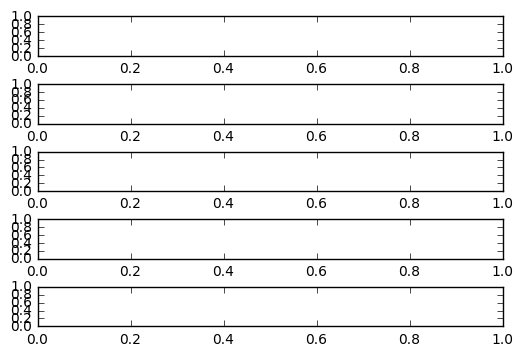

In [576]:
plot_example_errors_myimages(myimages, cls_true)

In [499]:
test_batch_size= 256

features = tf.placeholder(tf.float32, [None, train_features.shape[1]])
labels = tf.placeholder(tf.float32, [None, train_labels.shape[1]])

def print_test_accuracy_myimages(show_example_errors=False,
                        show_confusion_matrix=False):
    
    num_test = len(X_test_myimages)
    
    
    
    cls_pred = np.zeros(shape=num_test, dtype=np.int)
    
    i = 0
    
    while i < num_test:
        
        j = min(i + test_batch_size, num_test)
        
        images_my = test_features_myimages[i:j]
    
        #labels = train_labels[i:j]
        labels = test_labels_myimages[i:j]
        
        
        
        

        feed_dict = {x: X_test_myimages, y_true_myimages: labels}
        #feed_dict = {x: images, y_true: labels}
        
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)
        correct = [cls_pred[i]==test_cls[i] for i in range(len(cls_pred))]
        
        i = j
        
    cls_true = test_cls
    correct_sum = sum(correct)
   
    
    acc = float(correct_sum) / num_test
    
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    
    print (msg.format(acc, correct_sum, num_test))

    if show_example_errors:
        print ("Example errors:")
        plot_example_errors_myimages(cls_pred=cls_pred, correct=correct)
        
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)
        
    

In [505]:

print_test_accuracy_myimages()

Accuracy on Test-Set: 20.0% (1 / 5)


In [ ]:
plot_conv_weights(weights=weights_conv1)

In [ ]:
plot_conv_layer(layer=layer_conv1, image=my_images)

In [ ]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

In [ ]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

In [ ]:
plot_conv_layer(layer=layer_conv2, image=my_images)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
'''I resized my image to make it 32x32 so the quality seemed to go down quite a lot. I think that is part of the reason why none of them
were classified correctly. '''

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


In [ ]:
'''At this time unfortunately it isnt able to perform well on still photos so I really doubt it would perform well on a camera stream.'''

**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


In [ ]:
'''If all my images were classified incorrectly is that part still relevant for me? '''

**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

In [ ]:
'''I suspect I still have work to do. But since the deadline is today. I will submit and then wait for further feedback. '''

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.